#### 평가목표

- 데이터의 특성을 확인하고, 해당 정보를 해석할 수 있는가?

- 데이터 전처리 과정이 논리적으로 전개되었는가?

- 결측치 및 이상치를 판별할 수 있고, 해당 데이터를 처리할 수 있는가?

#### 평가기준

- 결측치 및 이상치 감지 방법의 적절하고 감지된 이상 치 및 결측치에 대한 처리 방법이 효과적인가?

- 텍스트 및 날짜 데이터를 자유롭게 변환하고 필요한 정보를 추출할 수 있는가?

- 데이터 변환 기법을 적합하게 사용하여 필요한 정보를 추출할수 있는가?

#### Step 1. 이것만큼은 꼭 해보세요!

1. 결측치 판단 및 처리

- 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.

2. 이상치 판단 및 처리

- 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.

#### Step 2. 이런것도 해볼 수 있어요!

1. 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.

- 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?

2. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

# 🚕 택시요금 데이터 다루기

## 📋 데이터 확인 및 정제

### 1. 라이브러리 import 와 데이터 로드

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/허재민/Desktop/DA5_JM/trip.csv')

### 2. 데이터 개요

- 데이터 수 : 22701
- 컬럼 수 : 9

In [300]:
display(df.head())
display(df.tail())
display(df.info())

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


None

In [301]:
display(df.describe())
display(df.isna().sum())
display(df.isna().mean())

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

- passenger_name (승객이름) : 데이터 분석에 필요없는 컬럼으로 제거하는게 좋겠다고 생각함.
    - 승객이름 컬럼 삭제 전 중복 데이터 있는지 검사 필요! 

- tpep_pickup_datetime & tpep_dropoff_datetime (승하차 시각) : 낮시간과 심야시간의 수요가 어느정도 차이나는지, 요금은 차이가 있는지 확인 하는데 활용 할 수 있을듯하다 

- payment_method (결제 방식) : 현금, 직불카드, 신용카드 3종류인데 현금 과 카드로 범주를 줄이고 분석하는게 효율적이라고 판단 예) 현금과 카드계산중 팁은 어느쪽이 높은지 

- passenger_count(손님수) : describe상에 나온 데이터로 min값이 0, max 36이 찍혀있어서 이상치로 판단

- trip_distance(이동 거리) : 이동거리 0마일찍혀있는것은 이상치로 판단, 75%에 비해 max값이 많이 튀어서 극단값 존재한다고 판단

- fare_amount(기본 요금 (순수 운임)) : 기본요금에 -값이 min에 있어서 이상치로 판단
    - NaN 값(결측치)이 fare-amount에 3개 있는것을 확인했다. 총 데이터 수가 22701개라서 3명의 손님 데이터는 제거하는게 낫다고 판단하였다. 결측치 비율 (0.0132%)

- tip_amount(팁 금액) : 팁 금액도 200달러로 극단값인지 이상치인지 확인이 필요하다고 판단

- tolls_amount(톨게이트(통행료)) : 특이사항 없음

### 3. NaN(결측치)제거 및 확인

In [302]:
df.loc[df[df['fare_amount'].isna()].index]



,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [303]:
df_clean = df.dropna()
display(df_clean.info())
display(df_clean.isna().mean())

<class 'pandas.core.frame.DataFrame'>
Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


None

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

### 4. 중복 데이터 확인 및 제거

In [304]:
display(df_clean[df_clean.duplicated()])
display(df_clean[df_clean['passenger_name'] == 'Sarah Gross'])
display(df_clean[df_clean['passenger_name'] == 'Lisa Bullock'])
df_clean = df_clean.drop_duplicates()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


### 5. 날짜 및 시간 데이터 처리

In [321]:
df_clean['tpep_pickup_datetime'] = pd.to_datetime(
    df_clean['tpep_pickup_datetime']
)

df_clean['tpep_dropoff_datetime'] = pd.to_datetime(
    df_clean['tpep_dropoff_datetime']
)
df_clean.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
payment_method                   object
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
tip_amount                      float64
tolls_amount                    float64
dtype: object

### 6. 이상치 확인 및 처리

In [305]:
def plot_eda_triplet(df, column, bins=30):
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    sns.histplot(df[column], bins=bins, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')

    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    axes[2].scatter(df.index, df[column], alpha=0.5)
    axes[2].set_title(f'Scatter (index vs {column})')
    axes[2].set_ylabel(column)

    plt.tight_layout()
    plt.show()

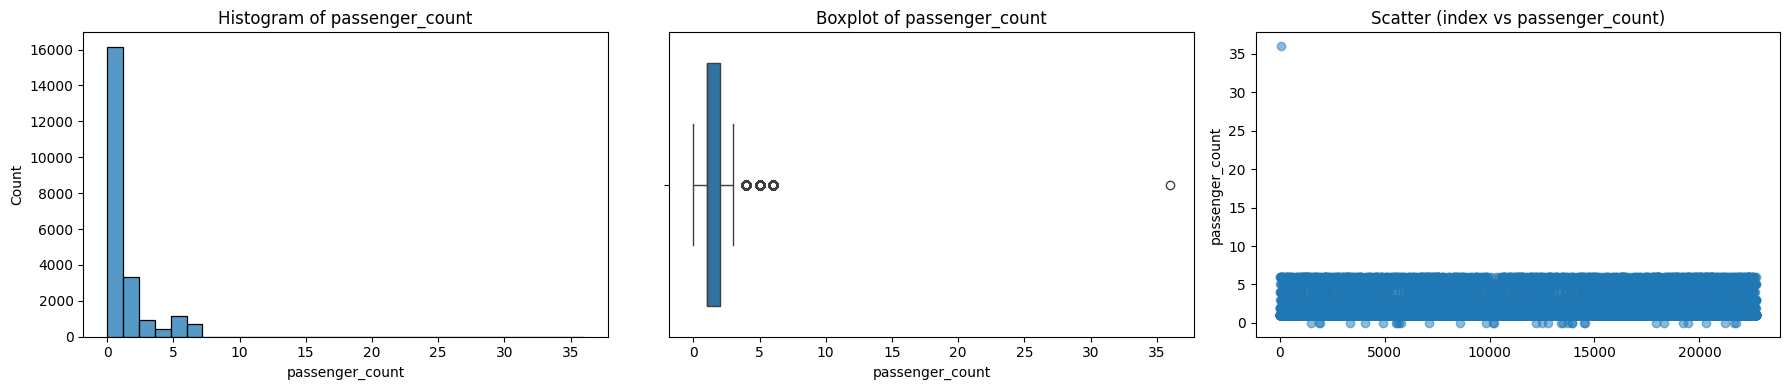

20312     0
9830      0
12205     0
4921      0
3354      0
         ..
15629     6
5059      6
4863      6
0         6
64       36
Name: passenger_count, Length: 22701, dtype: int64

In [306]:
plot_eda_triplet(df, 'passenger_count')
df['passenger_count'].sort_values()

- passenger_count(손님수)는 1보다 작은수는 1로 6보다 큰수는 6으로 치환

In [307]:
df_clean['passenger_count'] = df_clean['passenger_count'].apply(
    lambda x: 1 if x < 1 else (6 if x > 6 else x)
)

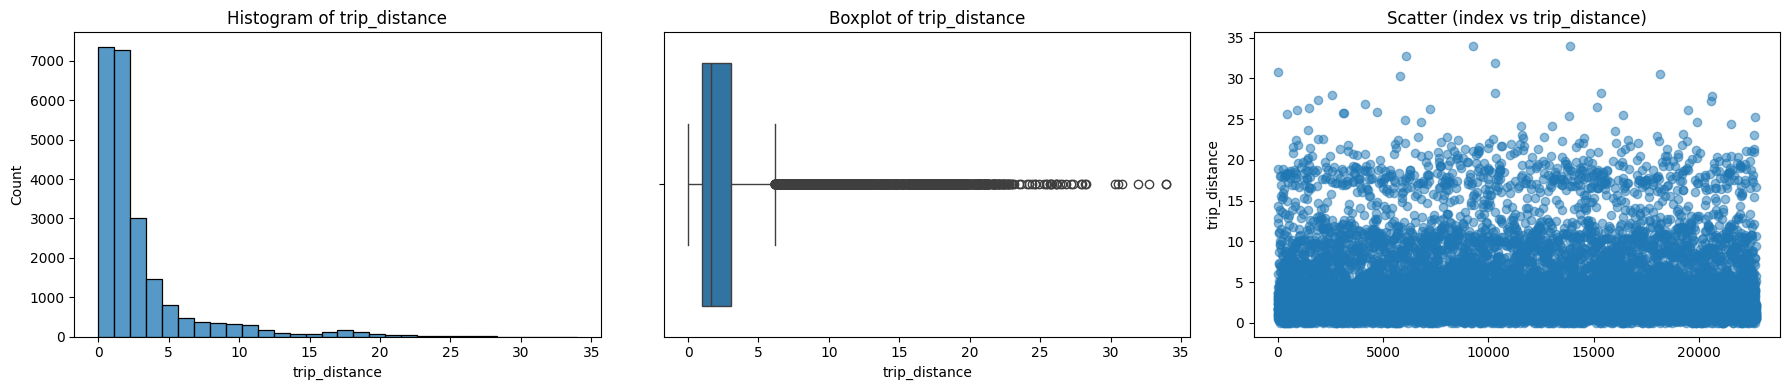

21838     0.00
11271     0.00
10418     0.00
2152      0.00
11252     0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22701, dtype: float64

In [308]:
plot_eda_triplet(df, 'trip_distance')

df['trip_distance'].sort_values()

- trip_distance(이동 거리)는 극단값이 존재하긴 하나 이상치로 보긴 힘들어 유지 하기로 함.

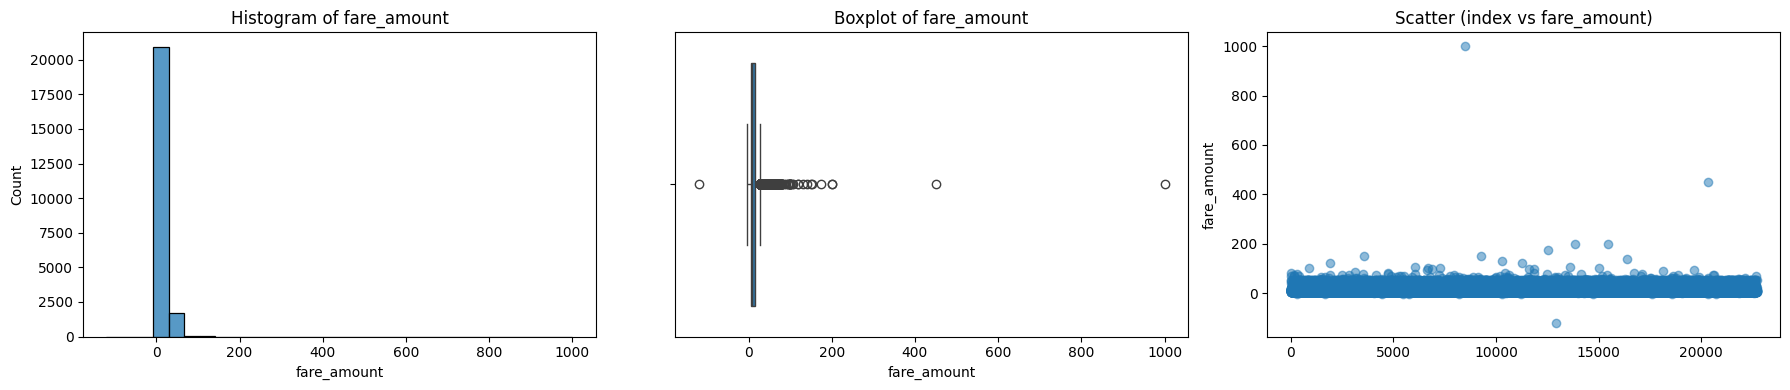

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
5450      -3.50
20319     -3.50
8206      -3.50
4425      -3.00
18567     -3.00
10283     -2.50
316       -2.50
1648      -2.50
5760      -2.50
5724       0.00
19069      0.00
22568      0.00
4404       0.00
10508      0.00
21844      0.00
14285      0.01
4063       0.01
13972      1.00
15501      2.50
5209       2.50
7151       2.50
1277       2.50
9531       2.50
11359      2.50
293        2.50
10641      2.50
1077       2.50
13308      2.50
13994      2.50
22104      2.50
19030      2.50
3062       2.50
5800       2.50
22525      2.50
2606       2.50
Name: fare_amount, dtype: float64

In [309]:
plot_eda_triplet(df, 'fare_amount')
df['fare_amount'].sort_values().head(40)

- fare_amount(기본 요금 (순수 운임)) 2.5달러 밑 과 200달러 이상의 값은 이상치로 판단하고 삭제 

In [310]:
df_clean.drop(
    df_clean[(df_clean['fare_amount'] < 2.5) | (df_clean['fare_amount'] >= 200)].index,
    inplace=True
)

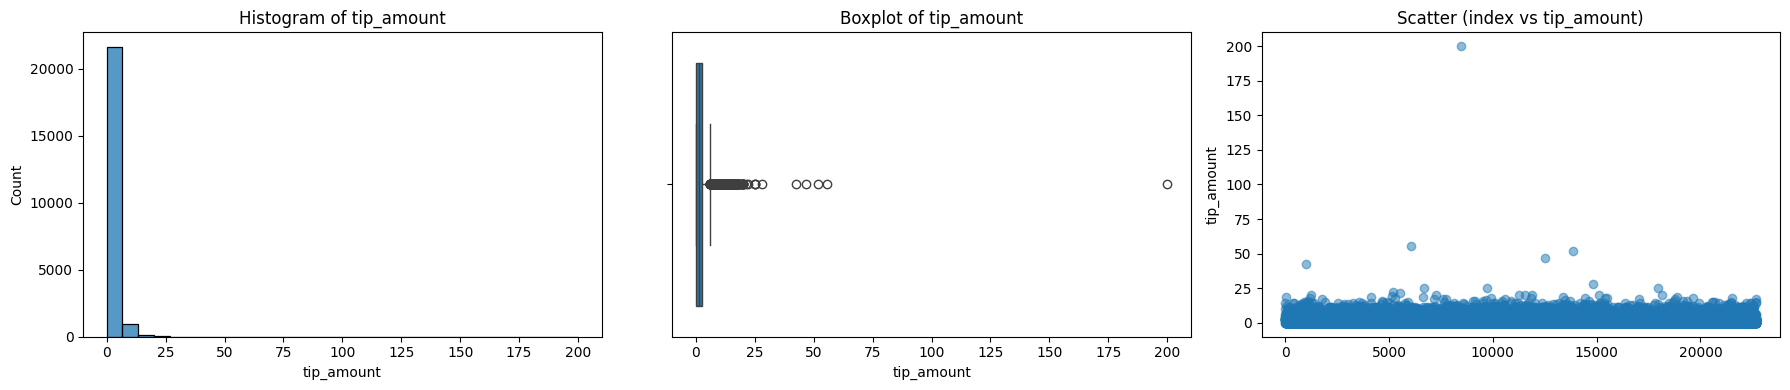

16782      0.00
5938       0.00
20563      0.00
5936       0.00
11805      0.00
          ...  
986       42.29
12513     46.69
13863     51.64
6066      55.50
8478     200.00
Name: tip_amount, Length: 22701, dtype: float64

In [311]:
plot_eda_triplet(df, 'tip_amount')
df['tip_amount'].sort_values()

- tip_amount(팁 금액)도 200달러는 이상치로 판단하고 제거 

In [312]:
df_clean.drop(
    df_clean[df_clean['tip_amount'] >= 200].index,
    inplace=True
)
len(df) - len(df_clean)

32

### 7. 고객이름 컬럼 제거 

In [313]:
df_clean.drop(columns=['passenger_name'], inplace=True)

In [316]:
display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22669 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22669 non-null  object 
 1   tpep_dropoff_datetime  22669 non-null  object 
 2   payment_method         22669 non-null  object 
 3   passenger_count        22669 non-null  int64  
 4   trip_distance          22669 non-null  float64
 5   fare_amount            22669 non-null  float64
 6   tip_amount             22669 non-null  float64
 7   tolls_amount           22669 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


None

**전체 데이터 22,701개 중 중복데이터,결측치,이상치 32개(0.14%)를 제거하여 데이터 품질은 유지하며 분석의 신뢰성을 확보하였다.**

### 8. 범주형 변수 확인 및 통합하기 

In [314]:
df_clean['payment_method'].value_counts()

payment_method
Cash           11180
Debit Card      5773
Credit Card     5716
Name: count, dtype: int64

- 직불카드와 신용카드 두개는 같은 카드결제이므로 통합 해주면 좀더 분석하기 편하다.

In [315]:
df_clean['payment_method'] = df_clean['payment_method'].replace({'Debit Card' : 'Card', 'Credit Card' : 'Card'})
df_clean['payment_method'].value_counts()

payment_method
Card    11489
Cash    11180
Name: count, dtype: int64

### 9. 가설설립 및 파생변수 생성

In [323]:
df_clean.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0


#### 1. 주말에 돈을 더 많이 벌 것이다.

- 요일 변수

#### 2. 출퇴근 하는 평일이 팁 수익이 더 클 것이다.

- 

#### 3. 톨게이트 비용을 지불하는 장거리 고객은 주말에 더 많을 것이다.

## 📋 